In [2]:
%pip install awswrangler --quiet
import boto3
import awswrangler as wr
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


### Read the flight data in as a dataframe and only retain the seconds of time elpased and climb_or_descent columns

In [3]:
lowg_flight = 's3://universityose-bucket/yvlcmb/LowG/2023/10/09/79bcca81-27d4-4ae5-b76b-c2b82e37d6ec.csv'

df = wr.s3.read_csv(
    boto3_session=boto3.Session(), 
    path=lowg_flight, 
    path_suffix='.csv',
    skip_blank_lines=True)

cut = df[['seconds', 'descent']].copy()
subset = df[['seconds', 'descent']].copy()

### Calculate and visualize vertical acceleration

In [4]:
subset = df[['seconds', 'descent']].copy()
subset['vertical_acceleration'] = (subset.descent - subset.descent.shift(1)) / (subset.seconds - subset.seconds.shift(1))

<AxesSubplot:>

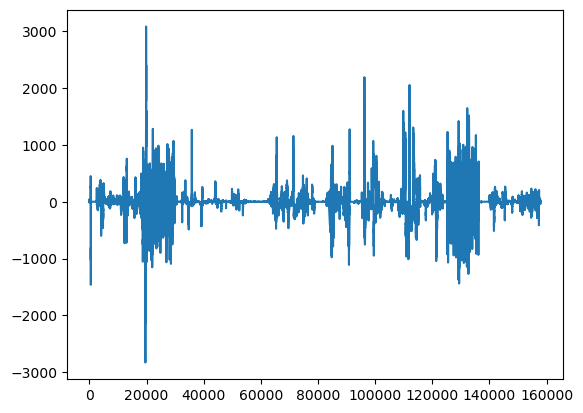

In [5]:
subset.vertical_acceleration.plot()

In [6]:
# these are the flight ids for 2023 so far:

flights_2023 = """
31dcb8_20230629T190833_20230629T190904
0eb374_20230105T201401_20230105T201440
0eb374_20230223T205620_20230223T205720
0eb374_20230223T210136_20230223T210232
0eb374_20230223T164654_20230223T164801
0eb374_20230223T205347_20230223T205509
0eb374_20230223T164922_20230223T165045
0eb374_20230223T153211_20230223T153437
0eb374_20230223T165427_20230223T165558
31dcb8_20230710T162405_20230710T162538
31dcb8_20230710T155106_20230710T155239
0eb374_20230223T205844_20230223T210023
0eb374_20230223T165145_20230223T165330
31dcb8_20230710T160252_20230710T160445
31dcb8_20230629T181533_20230629T181713
0eb374_20230223T165708_20230223T165902
0eb374_20230223T210349_20230223T210546
31dcb8_20230710T205756_20230710T205956
0eb374_20230223T164305_20230223T164503
31dcb8_20230711T162655_20230711T162857
0eb374_20230223T210649_20230223T210850
31dcb8_20230710T201615_20230710T201823
31dcb8_20230710T190342_20230710T190546
31dcb8_20230712T150330_20230712T150617
31dcb8_20230710T190830_20230710T191041
31dcb8_20230710T195841_20230710T200109
31dcb8_20230710T201151_20230710T201424
31dcb8_20230710T200236_20230710T200517
0eb374_20230223T152601_20230223T152955
31dcb8_20230710T204843_20230710T205126
31dcb8_20230710T192209_20230710T192440
31dcb8_20230615T132249_20230615T132535
31dcb8_20230720T134841_20230720T135124
31dcb8_20230710T191750_20230710T192030
0eb374_20230223T151900_20230223T152416
31dcb8_20230710T210642_20230710T210947
31dcb8_20230710T155331_20230710T155618
31dcb8_20230710T205303_20230710T205612
31dcb8_20230710T200659_20230710T201005
31dcb8_20230615T131914_20230615T132226
31dcb8_20230710T152345_20230710T152652
0eb374_20230216T191250_20230216T191559
31dcb8_20230712T182223_20230712T182544
31dcb8_20230710T210143_20230710T210504
31dcb8_20230717T151659_20230717T152005
31dcb8_20230710T191301_20230710T191615
31dcb8_20230629T180628_20230629T181021
31dcb8_20230717T160947_20230717T161300
31dcb8_20230711T184149_20230711T184520
31dcb8_20230629T205523_20230629T205914
31dcb8_20230710T153311_20230710T153712
31dcb8_20230717T135253_20230717T135629
31dcb8_20230713T160540_20230713T161015
0eb374_20230223T150911_20230223T151501
31dcb8_20230615T132632_20230615T133050
31dcb8_20230615T155023_20230615T155524
31dcb8_20230710T151400_20230710T151830
31dcb8_20230712T151229_20230712T151717
31dcb8_20230711T161620_20230711T162040
0eb374_20230209T153939_20230209T154349
0eb374_20230223T211800_20230223T212428
31dcb8_20230710T161248_20230710T161753
31dcb8_20230713T154811_20230713T155300
31dcb8_20230710T154159_20230710T154647
31dcb8_20230711T160534_20230711T161041
31dcb8_20230511T132332_20230511T132858
0eb374_20230112T205359_20230112T205943
31dcb8_20230713T140503_20230713T141052
31dcb8_20230629T173855_20230629T174605
31dcb8_20230629T134248_20230629T134852
31dcb8_20230710T150344_20230710T150936
31dcb8_20230907T191718_20230907T192343
31dcb8_20230717T150531_20230717T151132
31dcb8_20230712T180417_20230712T181100
0eb374_20230126T170430_20230126T171126
0eb374_20230216T191746_20230216T192349
31dcb8_20230629T154110_20230629T155010
31dcb8_20230711T144813_20230711T145427
31dcb8_20230717T155640_20230717T160341
0eb374_20230126T205028_20230126T205649
31dcb8_20230629T204716_20230629T205429
0eb374_20230209T231504_20230209T232117
31dcb8_20230713T151037_20230713T151749
0eb374_20230223T160725_20230223T161815
31dcb8_20230711T181914_20230711T183110
31dcb8_20230629T174845_20230629T175544
31dcb8_20230712T135833_20230712T140527
31dcb8_20230615T205258_20230615T210203
31dcb8_20230711T152059_20230711T152920
31dcb8_20230713T152109_20230713T152934
31dcb8_20230711T153350_20230711T154217
31dcb8_20230711T154902_20230711T155730
31dcb8_20230717T154339_20230717T155231
31dcb8_20230712T183424_20230712T184251
31dcb8_20230713T133704_20230713T134509
31dcb8_20230717T144914_20230717T145812
31dcb8_20230629T145637_20230629T150520
31dcb8_20230713T135335_20230713T140209
31dcb8_20230629T182002_20230629T182759
31dcb8_20230712T134345_20230712T135239
0eb374_20230223T162017_20230223T163339
31dcb8_20230711T150226_20230711T151122
31dcb8_20230710T142037_20230710T142946
31dcb8_20230710T144327_20230710T145309
31dcb8_20230810T151714_20230810T152616
31dcb8_20230711T143144_20230711T144122
31dcb8_20230717T143147_20230717T144130
31dcb8_20230629T191024_20230629T192041
31dcb8_20230717T134130_20230717T135123
31dcb8_20230713T143735_20230713T144717
31dcb8_20230629T184838_20230629T185913
31dcb8_20230717T140416_20230717T141434
31dcb8_20230613T134959_20230613T150242
31dcb8_20230629T141426_20230629T142413
31dcb8_20230712T144359_20230712T145358
31dcb8_20230601T170729_20230601T172058
31dcb8_20230629T152612_20230629T154009
31dcb8_20230629T150641_20230629T152308
31dcb8_20230622T183603_20230622T184848
31dcb8_20230524T152848_20230524T154014
31dcb8_20230615T200220_20230615T201354
31dcb8_20230629T155052_20230629T160601
31dcb8_20230717T152415_20230717T153506
31dcb8_20230712T152530_20230712T153723
0eb374_20230126T165108_20230126T170201
31dcb8_20230713T132349_20230713T133556
31dcb8_20230810T152912_20230810T154129
31dcb8_20230629T135355_20230629T140633
31dcb8_20230511T132928_20230511T134401
31dcb8_20230713T141553_20230713T142857
0eb374_20230126T191506_20230126T193309
31dcb8_20230523T153945_20230523T155221
31dcb8_20230712T130311_20230712T131738
31dcb8_20230629T203002_20230629T204354
31dcb8_20230713T130500_20230713T131955
31dcb8_20230712T132126_20230712T133520
0eb374_20230216T151400_20230216T152827
31dcb8_20230112T154547_20230112T160549
31dcb8_20230525T173826_20230525T175653
31dcb8_20230712T141803_20230712T143503
0eb374_20230216T154219_20230216T155835
31dcb8_20230711T140831_20230711T142640
0eb374_20230202T214143_20230202T215757
0eb374_20230209T172054_20230209T173929
31dcb8_20230711T175459_20230711T181812
0eb374_20230209T213727_20230209T221059
0eb374_20230105T195127_20230105T201132
31dcb8_20230223T203118_20230223T204927
0eb374_20230126T184242_20230126T190150
0eb374_20230209T151826_20230209T153723
31dcb8_20230615T133129_20230615T135220
31dcb8_20230615T210718_20230615T212555
31dcb8_20230629T182855_20230629T184636
31dcb8_20230615T201933_20230615T204127
31dcb8_20230629T192435_20230629T194529
0eb374_20230112T192514_20230112T194416
31dcb8_20230601T152240_20230601T154456
0eb374_20230105T201609_20230105T203954
31dcb8_20230810T195838_20230810T202603
31dcb8_20230613T150543_20230613T153014
0eb374_20230112T202510_20230112T205038
31dcb8_20230629T142713_20230629T145515
31dcb8_20230524T150008_20230524T152417
31dcb8_20230713T193538_20230713T200713
31dcb8_20230907T192504_20230907T194911
31dcb8_20230615T193227_20230615T200139
31dcb8_20230622T154022_20230622T160723
0eb374_20230202T170626_20230202T173307
31dcb8_20230717T194848_20230717T202829
31dcb8_20230525T175924_20230525T182857
31dcb8_20230717T181924_20230717T185915
31dcb8_20230710T182659_20230710T185740
31dcb8_20230615T160258_20230615T163145
31dcb8_20230713T185047_20230713T192445
31dcb8_20230601T144705_20230601T151913
31dcb8_20230717T130659_20230717T133626
31dcb8_20230216T144106_20230216T151110
31dcb8_20230831T151025_20230831T154402
0eb374_20230112T194706_20230112T201846
31dcb8_20230803T144447_20230803T152457
31dcb8_20230831T154541_20230831T162627
31dcb8_20230720T154427_20230720T162448
31dcb8_20230727T173429_20230727T181614
0eb374_20230209T205505_20230209T213334
0eb374_20230202T160231_20230202T164057
31dcb8_20230710T132735_20230710T141035
0eb374_20230126T142217_20230126T150306
31dcb8_20230802T190459_20230802T194611
31dcb8_20230518T190542_20230518T195118
"""

In [7]:
timestamps = [tuple(flight_id.split('_')) for flight_id in [line[7:] for line in flights_2023.split()]]

columns_and_aliases = {
    "flightState_location_longitude": "lon",
    "flightState_location_latitude": "lat",
    "times_gpsdatetime": "gps_time", 
    "times_seconds":"seconds",
    "flightstate_altitudes_gpsaltitude":"altitude", 
    "flightstate_position_pitch":"pitch", 
    "flightstate_position_roll":"roll",
    "flightstate_speeds_trueairspeed":"speed", 
    "flightstate_rates_climbordescentrate":"descent"
}

queries = []
for t1, t2 in timestamps:
    year = t1[:4]
    month = t1[4:6]
    day = t1[4:6]
    hour1 = t1[-6:]
    hour2 = t2[-6:]
    sql_query = '\n'.join((
        'SELECT', *[f'    {k} as {v}' for k, v in columns_and_aliases.items()], 
        "FROM 'flight_details'", 
        f"WHERE 'year' = {year}",
        f"AND 'month' = {month}",
        f"AND 'times_gpsdatetime' > cast({':'.join((hour1[-6:-4], hour1[-4:-2], hour1[-2:]+'.000'))}) as timestamp)",
        f"AND 'times_gpsdatetime' < cast({':'.join((hour2[-6:-4], hour2[-4:-2], hour2[-2:]+'.000'))}), as timestamp)\n"))
    queries.append(sql_query)

In [8]:
print(*queries, sep='\n')

SELECT
    flightState_location_longitude as lon
    flightState_location_latitude as lat
    times_gpsdatetime as gps_time
    times_seconds as seconds
    flightstate_altitudes_gpsaltitude as altitude
    flightstate_position_pitch as pitch
    flightstate_position_roll as roll
    flightstate_speeds_trueairspeed as speed
    flightstate_rates_climbordescentrate as descent
FROM 'flight_details'
WHERE 'year' = 2023
AND 'month' = 06
AND 'times_gpsdatetime' > cast(19:08:33.000) as timestamp)
AND 'times_gpsdatetime' < cast(19:09:04.000), as timestamp)

SELECT
    flightState_location_longitude as lon
    flightState_location_latitude as lat
    times_gpsdatetime as gps_time
    times_seconds as seconds
    flightstate_altitudes_gpsaltitude as altitude
    flightstate_position_pitch as pitch
    flightstate_position_roll as roll
    flightstate_speeds_trueairspeed as speed
    flightstate_rates_climbordescentrate as descent
FROM 'flight_details'
WHERE 'year' = 2023
AND 'month' = 01
AND 't